# Energy Consumption and CO2 Emission Analysis

This notebook is for data munging and analyzing for trends and correlations in Energy Consumption and CO2 Emission Data.

For final analysis, please refer to `TETC_CO2_Final_Analysis`.

### Library Imports and Paths

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# There's 51 because the data includes DC, the capital, separately as well.
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA',
          'HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
          'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY',
          'NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
          'UT','VT','VA','WA','WV','WI','WY']

# Paths to data
TETC_CA_path = '../Resources/TotalEnergyConsumption_CA.csv'
TETC_US_path = '../Resources/TotalEnergyConsumption_US.csv'
CO2_EMISS_CA_path = '../Resources/TotalCO2Emissions_CA.csv'
CO2_EMISS_US_path = '../Resources/TotalCO2Emissions_US.csv'
CO2_EMISS_NA_path = '../Resources/TotalCO2Emissions_NA.csv'
CO2_EMISS_World_path = '../Resources/TotalCO2Emissions_World.csv'
TETCB_STATES_path = '../Resources/TotalEnergyConsumption_TETCB_STATES.csv'
PATCB_STATES_path = '../Resources/TotalEnergyConsumption_PATCB_STATES.csv'
CLTCB_STATES_path = '../Resources/TotalEnergyConsumption_CLTCB_STATES.csv'
NGTCB_STATES_path = '../Resources/TotalEnergyConsumption_NGTCB_STATES.csv'
CO2_EMISS_TO_STATES_path = '../Resources/CO2_EMISS_TO_STATES.csv'
CO2_EMISS_PE_STATES_path = '../Resources/CO2_EMISS_PE_STATES.csv'
CO2_EMISS_CO_STATES_path = '../Resources/CO2_EMISS_CO_STATES.csv'
CO2_EMISS_NG_STATES_path = '../Resources/CO2_EMISS_NG_STATES.csv'

### Importing Data into Dataframes

In [2]:
# Put Total Energy Total Consumption Data into DataFrames
TETC_CA_df = pd.read_csv(TETC_CA_path)
TETC_US_df = pd.read_csv(TETC_US_path)
TETCB_STATES_df = pd.read_csv(TETCB_STATES_path)
PATCB_STATES_df = pd.read_csv(PATCB_STATES_path)
CLTCB_STATES_df = pd.read_csv(CLTCB_STATES_path)
NGTCB_STATES_df = pd.read_csv(NGTCB_STATES_path)

# Put CO2 Emission data into DataFrames
CO2_EMISS_CA_df = pd.read_csv(CO2_EMISS_CA_path)
CO2_EMISS_US_df = pd.read_csv(CO2_EMISS_US_path)
CO2_EMISS_NA_df = pd.read_csv(CO2_EMISS_NA_path)
CO2_EMISS_World_df = pd.read_csv(CO2_EMISS_World_path)
CO2_EMISS_TO_STATES_df = pd.read_csv(CO2_EMISS_TO_STATES_path)
CO2_EMISS_PE_STATES_df = pd.read_csv(CO2_EMISS_PE_STATES_path)
CO2_EMISS_CO_STATES_df = pd.read_csv(CO2_EMISS_CO_STATES_path)
CO2_EMISS_NG_STATES_df = pd.read_csv(CO2_EMISS_NG_STATES_path)

# Drop 'Unnamed: 0' column
TETC_CA_df = TETC_CA_df.drop(columns=['Unnamed: 0'])
TETC_US_df = TETC_US_df.drop(columns=['Unnamed: 0'])
TETCB_STATES_df = TETCB_STATES_df.drop(columns=['Unnamed: 0'])
PATCB_STATES_df = PATCB_STATES_df.drop(columns=['Unnamed: 0'])
CLTCB_STATES_df = CLTCB_STATES_df.drop(columns=['Unnamed: 0'])
NGTCB_STATES_df = NGTCB_STATES_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_CA_df = CO2_EMISS_CA_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_US_df = CO2_EMISS_US_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_NA_df = CO2_EMISS_NA_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_World_df = CO2_EMISS_World_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_TO_STATES_df = CO2_EMISS_TO_STATES_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_PE_STATES_df = CO2_EMISS_PE_STATES_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_CO_STATES_df = CO2_EMISS_CO_STATES_df.drop(columns=['Unnamed: 0'])
CO2_EMISS_NG_STATES_df = CO2_EMISS_NG_STATES_df.drop(columns=['Unnamed: 0'])

### Data Munging

#### Adding columns for averages of US data

In [3]:
# Create a new column for average.
# Take current data and divide by 51 because 51 states.
TETC_US_df['TETCB_US_AVG'] = TETC_US_df.TETCB_US / 51
TETC_US_df['PATCB_US_AVG'] = TETC_US_df.PATCB_US / 51
TETC_US_df['CLTCB_US_AVG'] = TETC_US_df.CLTCB_US / 51
TETC_US_df['NGTCB_US_AVG'] = TETC_US_df.NGTCB_US / 51
CO2_EMISS_US_df['US_ALL_CO2_AVG'] = CO2_EMISS_US_df['US All CO2 Emissions'] / 51
CO2_EMISS_US_df['US_PA_CO2_AVG'] = CO2_EMISS_US_df['US Petroleum CO2 Emissions'] / 51
CO2_EMISS_US_df['US_CL_CO2_AVG'] = CO2_EMISS_US_df['US Coal CO2 Emissions'] / 51
CO2_EMISS_US_df['US_NG_CO2_AVG'] = CO2_EMISS_US_df['US Natural Gas CO2 Emissions'] / 51

### Ranking Plot

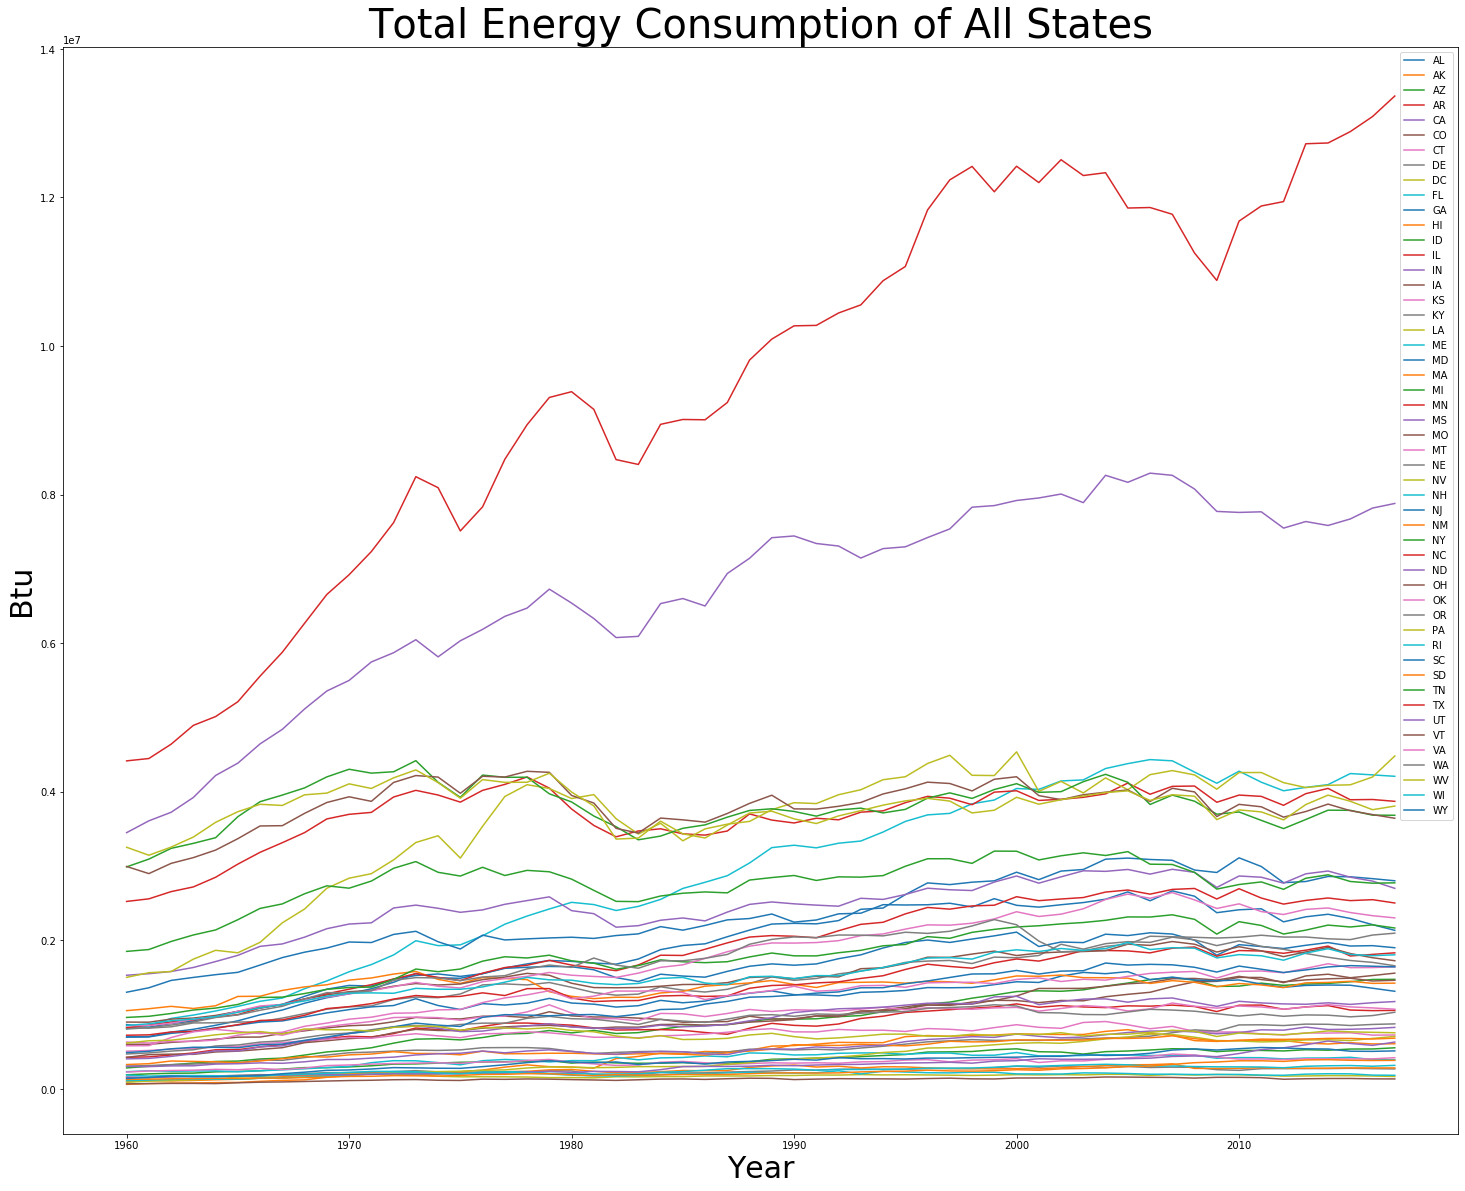

In [4]:
plt.figure(figsize=(25,20))

for state in states:
    plt.plot(TETCB_STATES_df.Year, TETCB_STATES_df[state], label=state)
    
plt.title("Total Energy Consumption of All States", fontsize=40)
plt.xlabel("Year",fontsize=30)
plt.ylabel("Btu",fontsize=30)
plt.legend()
plt.savefig('../Images/TETCB_State_Rankings.png',dpi=300)
plt.show()

### Top 5 States in Total Energy Consumed in 2017

In [5]:
total = 0
list_state = []
val_state = []
pct_state = []

for state in states:
    total += TETCB_STATES_df[state][0]
    
for state in states:
    list_state.append(state)
    val_state.append(TETCB_STATES_df[state][0])
    pct_state.append(100*TETCB_STATES_df[state][0]/total)

pct_state = pd.DataFrame(data={'State':list_state, 'TETCB (btu)':val_state, 'Percent of US (%)':pct_state})
pct_state = pct_state.sort_values(by='Percent of US (%)',ascending=False).reset_index()
pct_state = pct_state.drop(columns='index')
pct_state.head()

,State,TETCB (btu),Percent of US (%)
0,TX,13365864,13.687514
1,CA,7881348,8.071013
2,LA,4481816,4.589671
3,FL,4208521,4.309799
4,IL,3871546,3.964715


In [6]:
top_5 = pct_state.head().copy()

renamed_states = ['Texas', 'California', 'Louisiana', 'Florida', 'Illinois']
top_5.State = renamed_states
top_5

,State,TETCB (btu),Percent of US (%)
0,Texas,13365864,13.687514
1,California,7881348,8.071013
2,Louisiana,4481816,4.589671
3,Florida,4208521,4.309799
4,Illinois,3871546,3.964715


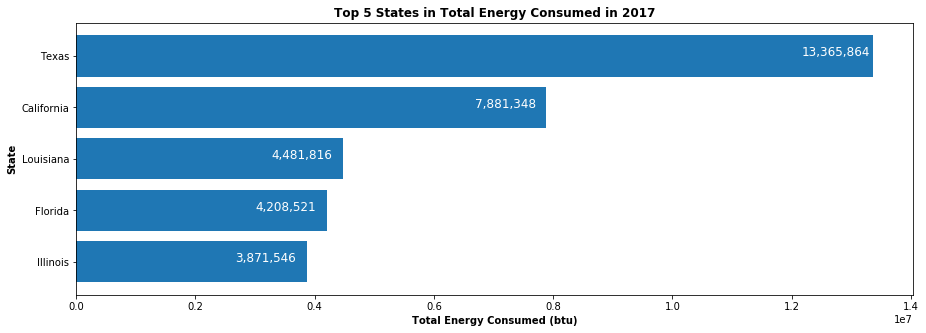

In [7]:
plt.figure(figsize=(15,5))
plt.barh(top_5.State, top_5['TETCB (btu)'])
plt.gca().invert_yaxis()
plt.title("Top 5 States in Total Energy Consumed in 2017", weight='bold')
plt.xlabel("Total Energy Consumed (btu)", weight='bold')
plt.ylabel("State", weight='bold')

for i, val in zip(range(len(top_5['TETCB (btu)'])),top_5['TETCB (btu)']):
    plt.annotate(f'{val:,}', (val-1200000,i), xycoords='data', color='white', size=12)

plt.savefig('../Images/TETCB_Top_5.png',dpi=300)
plt.show()

### Total Energy Consumption Plots for California and United States

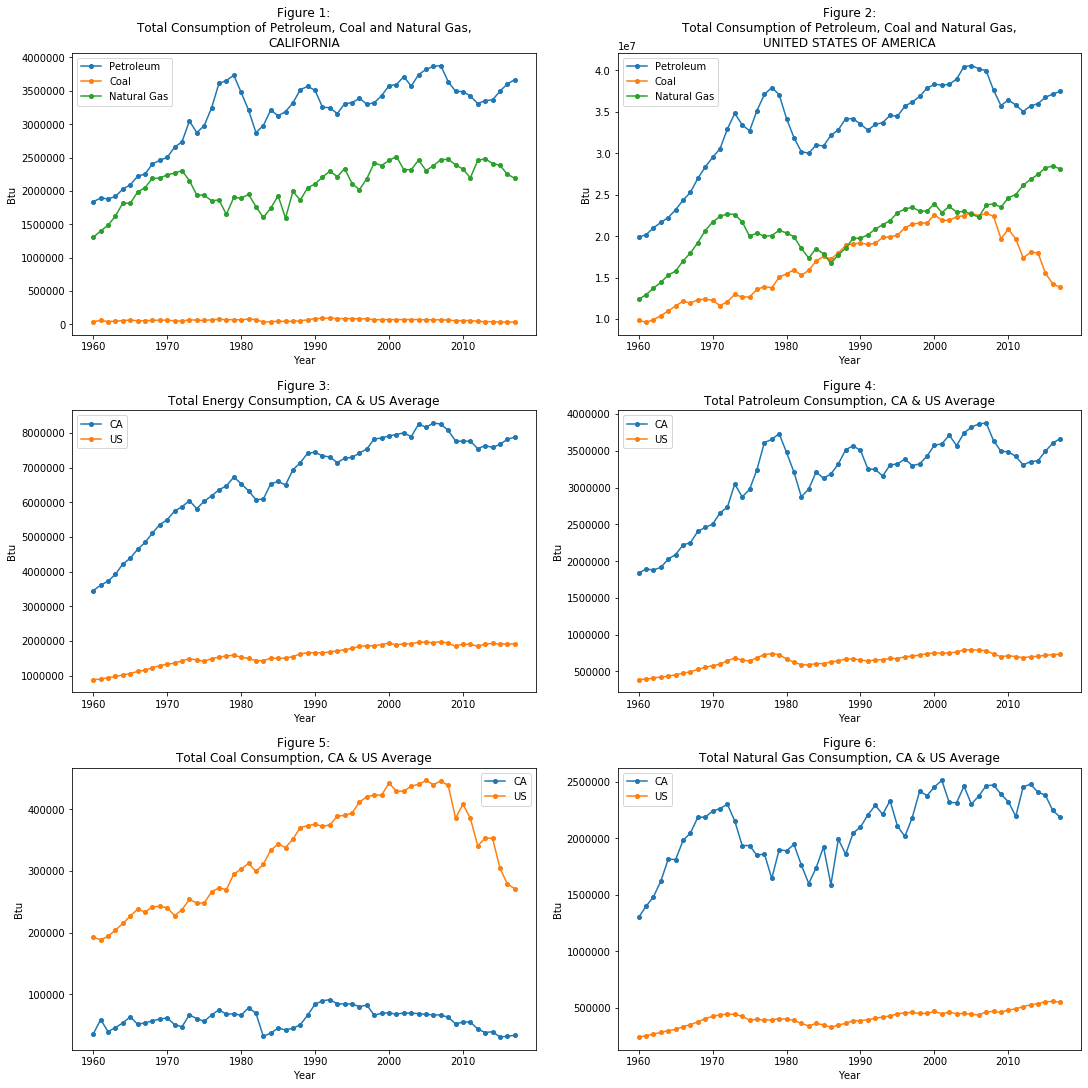

In [8]:
fig, ax = plt.subplots(3,2,
                       figsize=(15,15),
                       constrained_layout=True)

# Total Consumption of P,C,NG, CA, 1960-2017
ax[0,0].set_title("Figure 1:\nTotal Consumption of Petroleum, Coal and Natural Gas,\nCALIFORNIA")
ax[0,0].set(xlabel="Year", ylabel="Btu")
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.PATCB_CA, marker='o', markersize=4, label='Petroleum')
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.CLTCB_CA, marker='o', markersize=4, label='Coal')
ax[0,0].plot(TETC_CA_df.Year, TETC_CA_df.NGTCB_CA, marker='o', markersize=4, label='Natural Gas')
ax[0,0].legend()

# Total Consumption of P,C,NG, USA, 1960-2017
ax[0,1].set_title("Figure 2:\nTotal Consumption of Petroleum, Coal and Natural Gas,\nUNITED STATES OF AMERICA")
ax[0,1].set(xlabel="Year", ylabel="Btu")
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.PATCB_US, marker='o', markersize=4, label='Petroleum')
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.CLTCB_US, marker='o', markersize=4, label='Coal')
ax[0,1].plot(TETC_US_df.Year, TETC_US_df.NGTCB_US, marker='o', markersize=4, label='Natural Gas')
ax[0,1].legend()

# Total Energy Consumption, CA & US Average
ax[1,0].set_title("Figure 3:\nTotal Energy Consumption, CA & US Average")
ax[1,0].set(xlabel="Year", ylabel="Btu")
ax[1,0].plot(TETC_CA_df.Year, TETC_CA_df.TETCB_CA, marker='o', markersize=4, label='CA')
ax[1,0].plot(TETC_US_df.Year, TETC_US_df.TETCB_US_AVG, marker='o', markersize=4, label='US')
ax[1,0].legend()

# Total Patroleum Consumption, CA & US Average
ax[1,1].set_title("Figure 4:\nTotal Patroleum Consumption, CA & US Average")
ax[1,1].set(xlabel="Year", ylabel="Btu")
ax[1,1].plot(TETC_CA_df.Year, TETC_CA_df.PATCB_CA, marker='o', markersize=4, label='CA')
ax[1,1].plot(TETC_US_df.Year, TETC_US_df.PATCB_US_AVG, marker='o', markersize=4, label='US')
ax[1,1].legend()

# Total Coal Consumption, CA & US Average
ax[2,0].set_title("Figure 5:\nTotal Coal Consumption, CA & US Average")
ax[2,0].set(xlabel="Year", ylabel="Btu")
ax[2,0].plot(TETC_CA_df.Year, TETC_CA_df.CLTCB_CA, marker='o', markersize=4, label='CA')
ax[2,0].plot(TETC_US_df.Year, TETC_US_df.CLTCB_US_AVG, marker='o', markersize=4, label='US')
ax[2,0].legend()

# Total Natural Gas Consumption, CA & US Average
ax[2,1].set_title("Figure 6:\nTotal Natural Gas Consumption, CA & US Average")
ax[2,1].set(xlabel="Year", ylabel="Btu")
ax[2,1].plot(TETC_CA_df.Year, TETC_CA_df.NGTCB_CA, marker='o', markersize=4, label='CA')
ax[2,1].plot(TETC_US_df.Year, TETC_US_df.NGTCB_US_AVG, marker='o', markersize=4, label='US')
ax[2,1].legend()

plt.savefig('../Images/TETCB_CA_Line_Plot.png',dpi=300)

plt.show()

### Total CO2 Emission Plots for California and United States

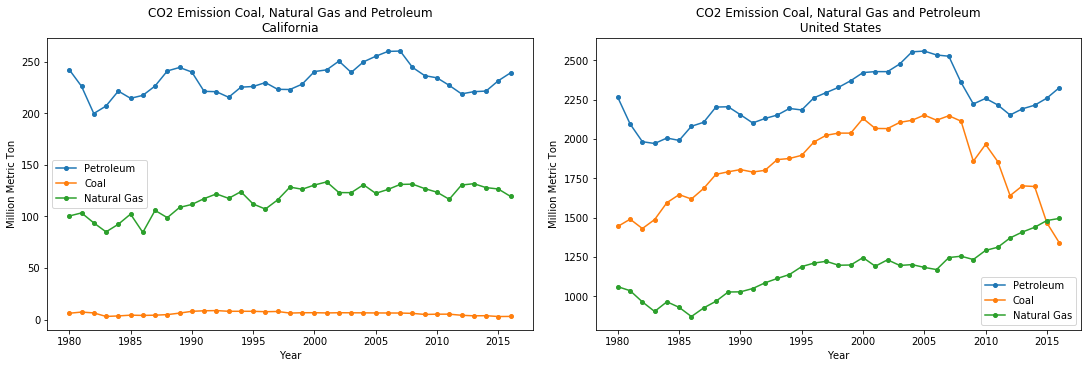

In [9]:
fig, ax = plt.subplots(1,2,
                       figsize=(15,5),
                       constrained_layout=True)

# Total CO2 Emission of P,C,NG, CA, 1980-2016
ax[0].set_title('CO2 Emission Coal, Natural Gas and Petroleum\nCalifornia')
ax[0].set(xlabel='Year', ylabel='Million Metric Ton')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Petroleum CO2 Emissions'], marker='o', markersize=4, label='Petroleum')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Coal CO2 Emissions'], marker='o', markersize=4, label='Coal')
ax[0].plot(CO2_EMISS_CA_df['Year'], CO2_EMISS_CA_df['CA Natural Gas CO2 Emissions'], marker='o', markersize=4, label='Natural Gas')
ax[0].legend()

# Total CO2 Emission of P,C,NG, US, 1980-2016
ax[1].set_title('CO2 Emission Coal, Natural Gas and Petroleum\n United States')
ax[1].set(xlabel='Year', ylabel='Million Metric Ton')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Petroleum CO2 Emissions'], marker='o', markersize=4, label='Petroleum')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Coal CO2 Emissions'], marker='o', markersize=4, label='Coal')
ax[1].plot(CO2_EMISS_US_df['Year'], CO2_EMISS_US_df['US Natural Gas CO2 Emissions'], marker='o', markersize=4, label='Natural Gas')
ax[1].legend(loc='lower right')

plt.savefig('../Images/CO2_CA_Line_Plot.png',dpi=300)

plt.show()

### Group Bar Chart of Total Energy Consumption CA vs US

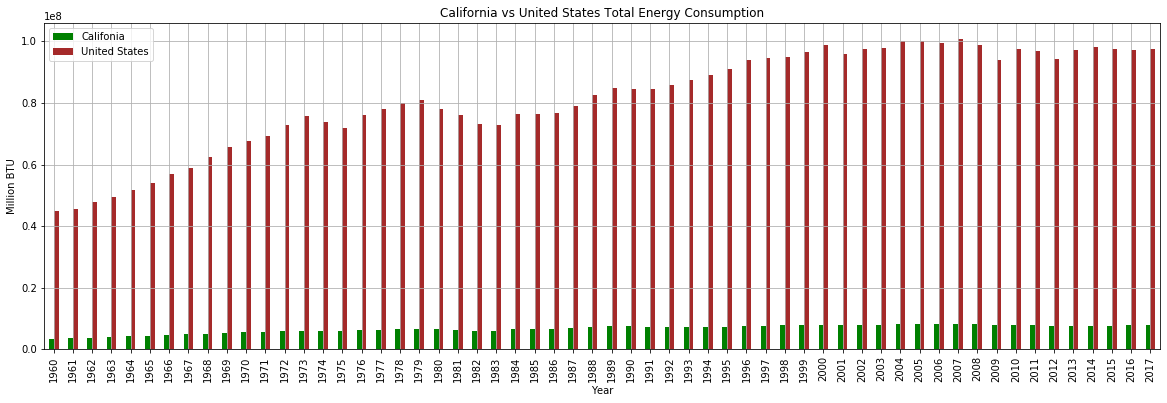

In [10]:
TEC_CAvsUS = TETC_CA_df[['Year','TETCB_CA']]
TEC_CAvsUS = TEC_CAvsUS.merge(TETC_US_df[['Year','TETCB_US']], how ='left')
TEC_CAvsUS = TEC_CAvsUS.set_index('Year')
TEC_CAvsUS = TEC_CAvsUS.sort_values('Year')
ax = TEC_CAvsUS.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('California vs United States Total Energy Consumption')
plt.legend(['Califonia','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')

plt.savefig('../Images/TETCB_CA_vs_US_Bar.png',dpi=300)

plt.show()

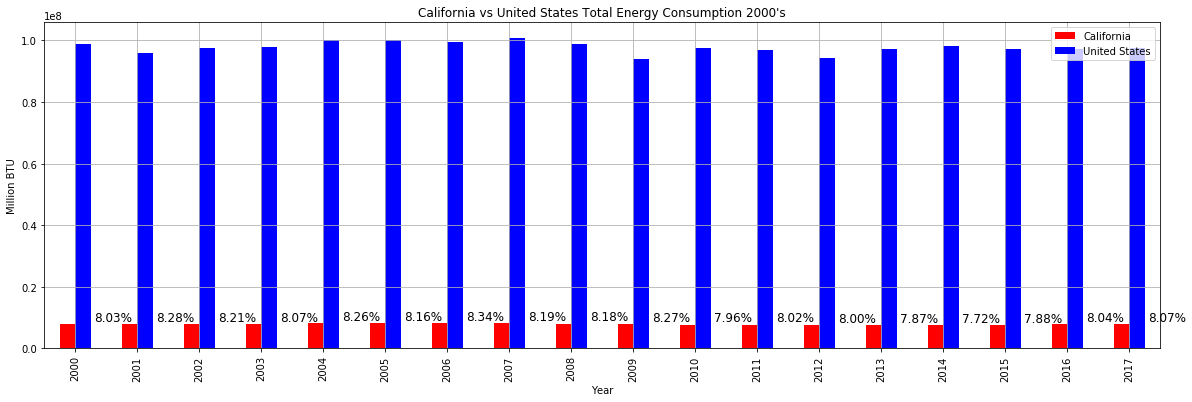

In [11]:
#filter data to only Year 2000s
TEC_CAvsUS_2000s = TEC_CAvsUS.reset_index()
TEC_CAvsUS_filtered = TEC_CAvsUS_2000s[TEC_CAvsUS_2000s['Year'] > 1999]
TEC_CAvsUS_filtered = TEC_CAvsUS_filtered.set_index('Year')
TEC_CAvsUS_filtered = TEC_CAvsUS_filtered.sort_values('Year')
ax = TEC_CAvsUS_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("California vs United States Total Energy Consumption 2000's")
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')

TEC_CAvsUS_filtered['CA_PCT'] = 100 * TEC_CAvsUS_filtered.TETCB_CA / TEC_CAvsUS_filtered.TETCB_US
for i, val, val_ca in zip(range(len(TEC_CAvsUS_filtered.CA_PCT)),TEC_CAvsUS_filtered.CA_PCT, TEC_CAvsUS_filtered.TETCB_CA):
    plt.annotate(f'{val:0.2f}%', (i + 0.3, val_ca+1000000), xycoords='data', color='black', size=12)

plt.savefig('../Images/TETCB_CA_vs_US_Bar_2000.png',dpi=300)
    
plt.show()

In [12]:
TEC_CAvsUS_filtered

,TETCB_CA,TETCB_US,CA_PCT
Year,,,
2000,7921270,98694694,8.026034
2001,7955161,96037904,8.283355
2002,8008105,97540330,8.210045
2003,7892261,97833112,8.067065
2004,8260248,100010334,8.259394
2005,8166058,100097668,8.158090
2006,8289269,99354258,8.343144
2007,8260040,100870038,8.188794
2008,8075576,98724712,8.179893


### Group Bar Chart of Total CO2 Emission CA vs US

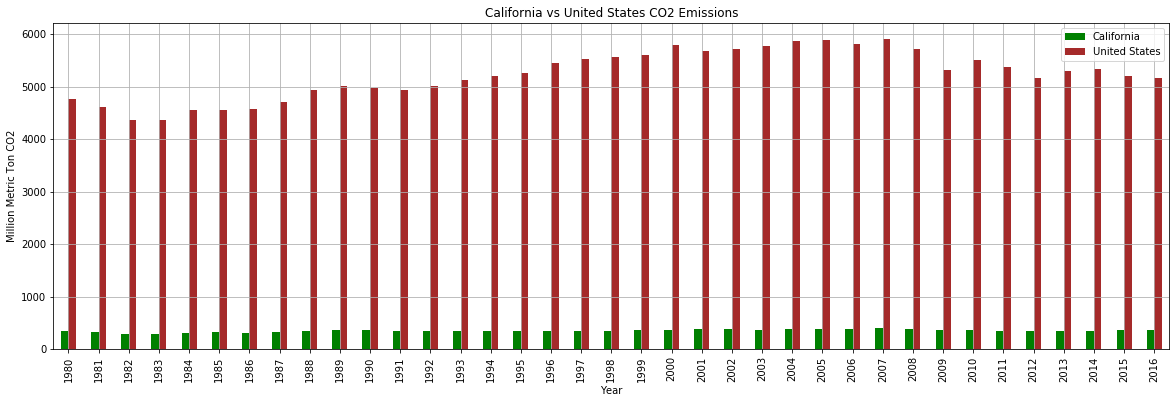

In [13]:
CO2_CAvsUS = CO2_EMISS_CA_df[['Year', 'CA All CO2 Emissions' ]]
CO2_CAvsUS = CO2_CAvsUS.merge(CO2_EMISS_US_df[['Year','US All CO2 Emissions']], how ='left')
CO2_CAvsUS = CO2_CAvsUS.set_index('Year')
CO2_CAvsUS = CO2_CAvsUS.sort_values('Year')
ax = CO2_CAvsUS.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('California vs United States CO2 Emissions')
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')

plt.savefig('../Images/CO2_CA_vs_US_Bar.png',dpi=300)

plt.show()

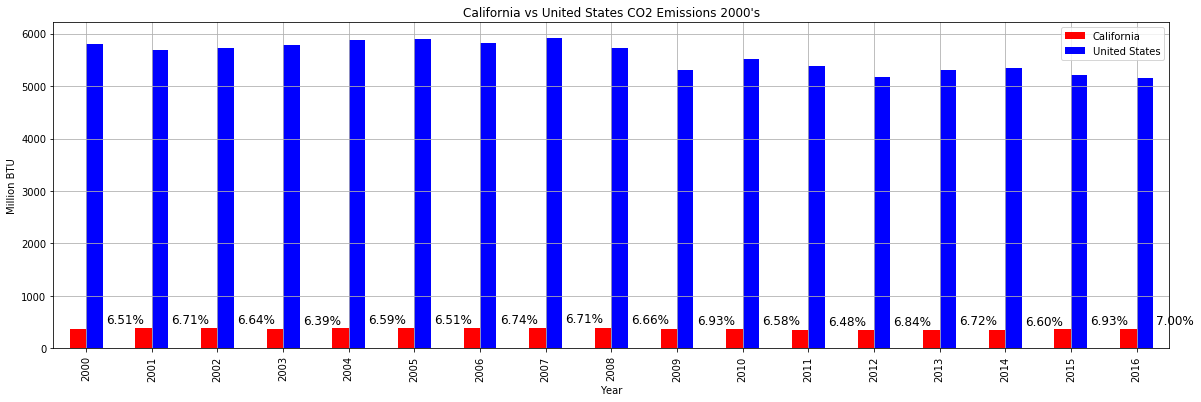

In [14]:
#filter data to only Year 2000s
CO2_CAvsUS_2000s = CO2_CAvsUS.reset_index()
CO2_CAvsUS_filtered = CO2_CAvsUS_2000s[CO2_CAvsUS_2000s['Year'] > 1999]
CO2_CAvsUS_filtered = CO2_CAvsUS_filtered.set_index('Year')
CO2_CAvsUS_filtered = CO2_CAvsUS_filtered.sort_values('Year')
ax = CO2_CAvsUS_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("California vs United States CO2 Emissions 2000's")
plt.legend(['California','United States'])
plt.xlabel('Year')
plt.ylabel('Million BTU')
plt.grid(axis='both')

CO2_CAvsUS_filtered['CA_PCT'] = 100 * CO2_CAvsUS_filtered['CA All CO2 Emissions'] / CO2_CAvsUS_filtered['US All CO2 Emissions']
for i, val, val_ca in zip(range(len(CO2_CAvsUS_filtered['CA_PCT'])),CO2_CAvsUS_filtered['CA_PCT'], CO2_CAvsUS_filtered['CA All CO2 Emissions']):
    plt.annotate(f'{val:0.2f}%', (i + 0.3, val_ca+100), xycoords='data', color='black', size=12)

plt.savefig('../Images/CO2_CA_vs_US_Bar_2000.png',dpi=300)
    
plt.show()


In [15]:
CO2_CAvsUS_filtered

,CA All CO2 Emissions,US All CO2 Emissions,CA_PCT
Year,,,
2000,377.223937,5797.902868,6.506213
2001,381.691810,5685.468162,6.713463
2002,380.037324,5725.245815,6.637922
2003,368.907884,5777.692218,6.385039
2004,386.797263,5873.565342,6.585391
2005,383.748295,5893.552285,6.511324
2006,392.227025,5822.296551,6.736638
2007,397.347483,5919.121363,6.712947
2008,381.485118,5726.287029,6.661998


### Group Bar Chart of Total CO2 Emission of United States vs. North America

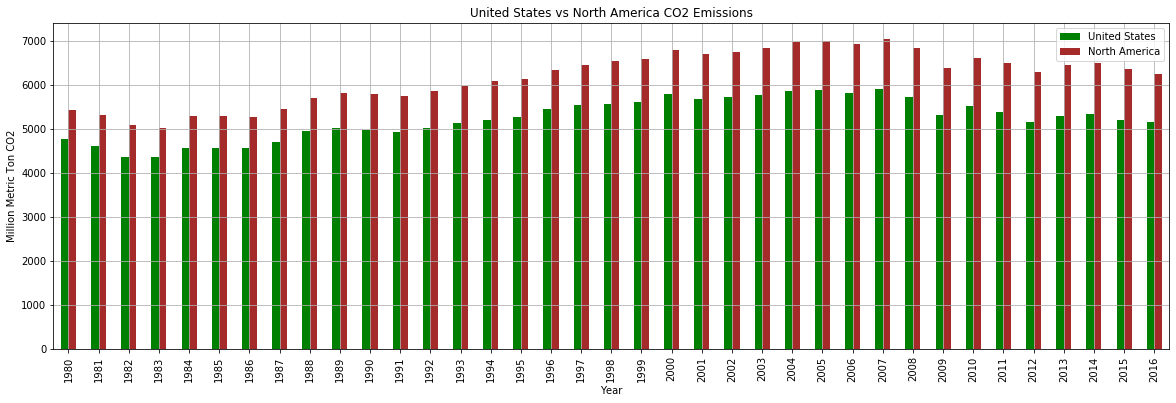

In [16]:
CO2_USvsNA = CO2_EMISS_US_df[['Year', 'US All CO2 Emissions' ]]
CO2_USvsNA = CO2_USvsNA.merge(CO2_EMISS_NA_df[['Year','North America CO2 Emissions']], how ='left')
CO2_USvsNA = CO2_USvsNA.set_index('Year')
CO2_USvsNA = CO2_USvsNA.sort_values('Year')
ax = CO2_USvsNA.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('United States vs North America CO2 Emissions')
plt.legend(['United States','North America'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')

plt.savefig('../Images/CO2_US_vs_NA_Bar.png',dpi=300)

plt.show()

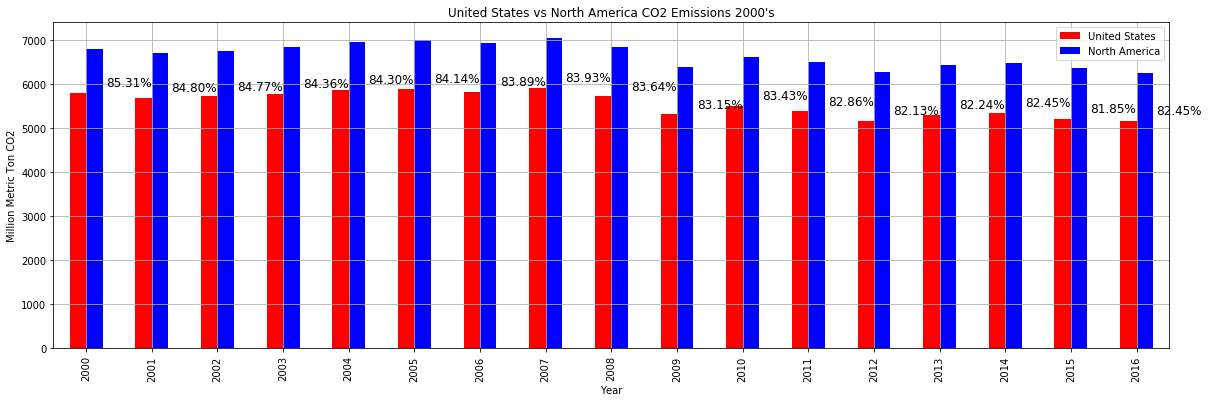

In [17]:
#filter data to only Year 2000s
CO2_USvsNA_2000s = CO2_USvsNA.reset_index()
CO2_USvsNA_filtered = CO2_USvsNA_2000s[CO2_USvsNA_2000s['Year'] > 1999]
CO2_USvsNA_filtered = CO2_USvsNA_filtered.set_index('Year')
CO2_USvsNA_filtered = CO2_USvsNA_filtered.sort_values('Year')
ax = CO2_USvsNA_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("United States vs North America CO2 Emissions 2000's")
plt.legend(['United States','North America'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')

CO2_USvsNA_filtered['US_PCT'] = 100 * CO2_USvsNA_filtered['US All CO2 Emissions'] / CO2_USvsNA_filtered['North America CO2 Emissions']
for i, val, val_ca in zip(range(len(CO2_USvsNA_filtered['US_PCT'])),CO2_USvsNA_filtered['US_PCT'], CO2_USvsNA_filtered['US All CO2 Emissions']):
    plt.annotate(f'{val:0.2f}%', (i + 0.3, val_ca+150), xycoords='data', color='black', size=12)

plt.savefig('../Images/CO2_US_vs_NA_Bar_2000.png',dpi=300)
    
plt.show()

In [18]:
CO2_USvsNA_filtered

,US All CO2 Emissions,North America CO2 Emissions,US_PCT
Year,,,
2000,5797.902868,6796.492683,85.307277
2001,5685.468162,6704.502633,84.800745
2002,5725.245815,6754.126419,84.766637
2003,5777.692218,6849.018613,84.357958
2004,5873.565342,6967.178749,84.303354
2005,5893.552285,7004.791968,84.136007
2006,5822.296551,6940.233410,83.891941
2007,5919.121363,7052.545200,83.928868
2008,5726.287029,6846.546505,83.637598


### Group Bar Chart of Total CO2 Emission of United States vs. World

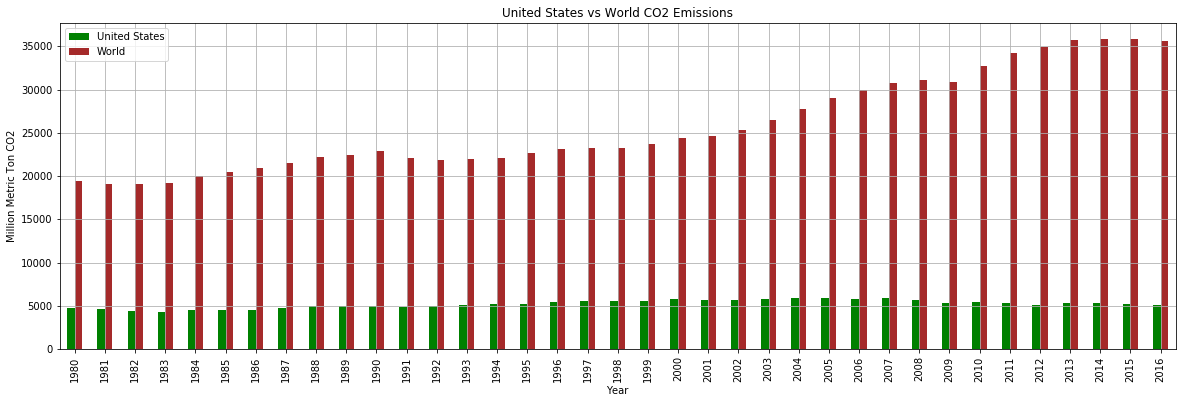

In [19]:
CO2_USvsWorld = CO2_EMISS_US_df[['Year','US All CO2 Emissions']]
CO2_USvsWorld = CO2_USvsWorld.merge(CO2_EMISS_World_df[['Year','World CO2 Emissions']], how ='left')
CO2_USvsWorld = CO2_USvsWorld.set_index('Year')
CO2_USvsWorld = CO2_USvsWorld.sort_values('Year')
ax = CO2_USvsWorld.plot(kind='bar', figsize=(20,6),color=['green', 'brown'])
plt.title('United States vs World CO2 Emissions')
plt.legend(['United States','World'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')

plt.savefig('../Images/CO2_US_vs_World_Bar.png',dpi=300)

plt.show()

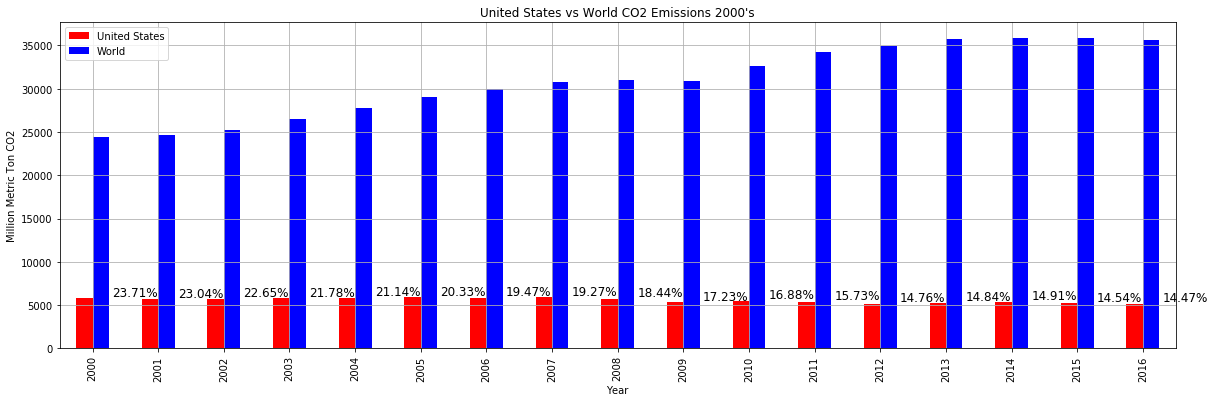

In [20]:
#filter data to only Year 2000s
CO2_USvsWorld_2000s = CO2_USvsWorld.reset_index()
CO2_USvsWorld_filtered = CO2_USvsWorld_2000s[CO2_USvsWorld_2000s['Year'] > 1999]
CO2_USvsWorld_filtered = CO2_USvsWorld_filtered.set_index('Year')
CO2_USvsWorld_filtered = CO2_USvsWorld_filtered.sort_values('Year')

ax = CO2_USvsWorld_filtered.plot(kind='bar', figsize=(20,6),color=['r', 'b'])
plt.title("United States vs World CO2 Emissions 2000's")
plt.legend(['United States','World'])
plt.xlabel('Year')
plt.ylabel('Million Metric Ton CO2')
plt.grid(axis='both')

CO2_USvsWorld_filtered['US_PCT'] = 100 * CO2_USvsWorld['US All CO2 Emissions'] / CO2_USvsWorld['World CO2 Emissions']
for i, val, val_ca in zip(range(len(CO2_USvsWorld_filtered['US_PCT'])),CO2_USvsWorld_filtered['US_PCT'], CO2_USvsWorld_filtered['US All CO2 Emissions']):
    plt.annotate(f'{val:0.2f}%', (i + 0.3, val_ca+300), xycoords='data', color='black', size=12)

plt.savefig('../Images/CO2_US_vs_World_Bar_2000.png',dpi=300)

plt.show()

In [21]:
CO2_USvsWorld_filtered

,US All CO2 Emissions,World CO2 Emissions,US_PCT
Year,,,
2000,5797.902868,24456.467314,23.707033
2001,5685.468162,24676.753230,23.039774
2002,5725.245815,25275.667736,22.651215
2003,5777.692218,26532.184906,21.776164
2004,5873.565342,27786.318664,21.138336
2005,5893.552285,28985.937408,20.332454
2006,5822.296551,29907.034780,19.467983
2007,5919.121363,30717.366591,19.269625
2008,5726.287029,31050.646688,18.441764


### Scatterplot Total Energy Consumption vs. CO2 Emission

In [22]:
TEC_vs_CO2_STATES = CO2_EMISS_TO_STATES_df.copy()
TEC_vs_CO2_STATES = TEC_vs_CO2_STATES.merge(TETCB_STATES_df, how='left', on='Year',suffixes=('_CO2','_TETC'))
TEC_vs_CO2_STATES.head()

# Combined
TEC_list = []
CO2_list = []
for state in states:
    TEC_list = TEC_list + list(TEC_vs_CO2_STATES[state+'_TETC'])
    CO2_list = CO2_list + list(TEC_vs_CO2_STATES[state+'_CO2'])
TEC_vs_CO2_COMBINED = pd.DataFrame(data={'TEC':TEC_list,'CO2':CO2_list})

#### Separated by State

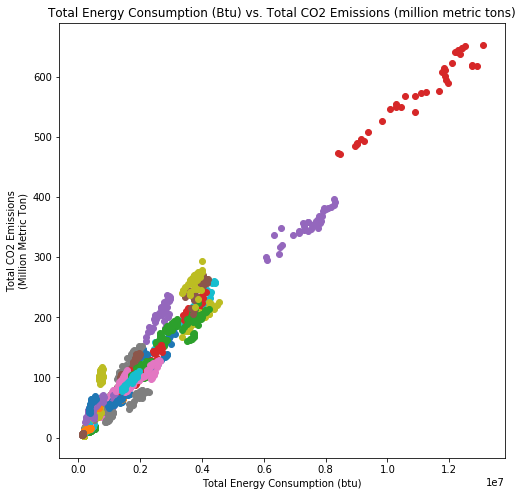

In [23]:
plt.figure(figsize=(8,8))

for state in states:
    plt.scatter(TEC_vs_CO2_STATES[state+'_TETC'], TEC_vs_CO2_STATES[state+'_CO2'])

plt.title("Total Energy Consumption (Btu) vs. Total CO2 Emissions (million metric tons)")
plt.xlabel("Total Energy Consumption (btu)")
plt.ylabel("Total CO2 Emissions\n(Million Metric Ton)")

plt.savefig('../Images/TETCBvsCO2_State_Correlation.png',dpi=300)

plt.show()

#### Combined

In [24]:
TEC_vs_CO2_STATES = CO2_EMISS_TO_STATES_df.copy()
TEC_vs_CO2_STATES = TEC_vs_CO2_STATES.merge(TETCB_STATES_df, how='left', on='Year',suffixes=('_CO2','_TETC'))
TEC_vs_CO2_STATES.head()

# Combined
TEC_list = []
CO2_list = []
for state in states:
    TEC_list = TEC_list + list(TEC_vs_CO2_STATES[state+'_TETC'])
    CO2_list = CO2_list + list(TEC_vs_CO2_STATES[state+'_CO2'])
TEC_vs_CO2_COMBINED = pd.DataFrame(data={'TEC':TEC_list,'CO2':CO2_list})

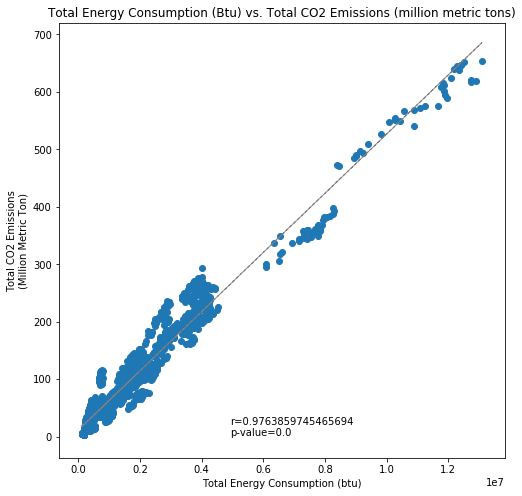

In [25]:
plt.figure(figsize=(8,8))

# Line of Best Fit
slope, intercept, r_value, p_value, std_err = stats.linregress(TEC_vs_CO2_COMBINED.TEC, TEC_vs_CO2_COMBINED.CO2)
line = slope*TEC_vs_CO2_COMBINED.TEC+intercept
plt.plot(TEC_vs_CO2_COMBINED.TEC, line, c='grey', linestyle='--', linewidth=1)

# Scatter
plt.scatter(TEC_vs_CO2_COMBINED.TEC, TEC_vs_CO2_COMBINED.CO2)

plt.title("Total Energy Consumption (Btu) vs. Total CO2 Emissions (million metric tons)")
plt.xlabel("Total Energy Consumption (btu)")
plt.ylabel("Total CO2 Emissions\n(Million Metric Ton)")

# Annotate r-value
plt.annotate(f"r={r_value}\np-value={p_value}", (230,60), xycoords='figure points')

plt.savefig('../Images/TETCBvsCO2_State_Combined_Correlation.png',dpi=300)

plt.show()

### Scatterplot Total Energy Consumption vs. CO2 Emission in California

#### Merge Dataframes since year interval is different

In [26]:
TEC_vs_CO2 = CO2_EMISS_CA_df[['Year','CA All CO2 Emissions']].copy()
TEC_vs_CO2 = TEC_vs_CO2.merge(TETC_CA_df[['Year','TETCB_CA']], how='left')

#### Scatterplot

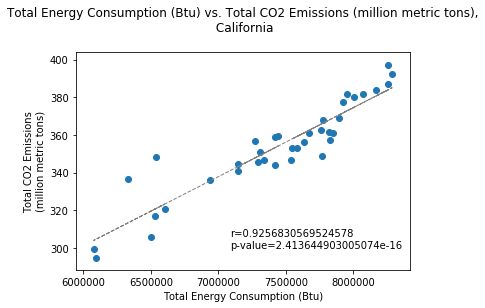

In [27]:
# Line of Best Fit
slope, intercept, r_value, p_value, std_err = stats.linregress(TEC_vs_CO2.TETCB_CA, TEC_vs_CO2['CA All CO2 Emissions'])
line = slope*TEC_vs_CO2.TETCB_CA+intercept
plt.plot(TEC_vs_CO2.TETCB_CA, line, c='grey', linestyle='--', linewidth=1)

# Scatterplot
plt.scatter(TEC_vs_CO2.TETCB_CA, TEC_vs_CO2['CA All CO2 Emissions'])
plt.title("Total Energy Consumption (Btu) vs. Total CO2 Emissions (million metric tons),\n California\n")
plt.xlabel("Total Energy Consumption (Btu)")
plt.ylabel("Total CO2 Emissions\n(million metric tons)")

# Annotate r-value
plt.annotate(f"r={r_value}\np-value={p_value}", (230,60), xycoords='figure points')

plt.savefig('../Images/TETCBvsCO2_CA_Correlation.png',dpi=300)

plt.show()

##### Test to see how many states have a strong positive correlation

In [28]:
def r_p_style(val):
    color = 'green' if abs(float(val)) < 0.05 or abs(float(val)) > 0.8 else 'black'
    return 'color: %s' % color

In [29]:
cor_state_state = []
cor_state_r = []
cor_state_p = []

reliable_count = 0

for state in states:
    slope, intercept, r_value, p_value, std_err = stats.linregress(TEC_vs_CO2_STATES[state+'_TETC'], TEC_vs_CO2_STATES[state+'_CO2'])
    cor_state_state.append(state)
    cor_state_r.append(r_value)
    cor_state_p.append(p_value)
    if r_value >= 0.80 and p_value < 0.05:
        reliable_count += 1
    
cor_state = pd.DataFrame(data={'State':cor_state_state,'r-val':cor_state_r,'p-val':cor_state_p})
cor_state = cor_state.set_index('State')
cor_state = cor_state.style.applymap(r_p_style)
print(f"Amount of states with strong positive correlation: {reliable_count}")
cor_state

Amount of states with strong positive correlation: 36


,r-val,p-val
State,,
AL,0.954716,5.23272e-20
AK,0.995558,1.63293e-37
AZ,0.972018,1.31738e-23
AR,0.911435,4.63018e-15
CA,0.925683,2.41364e-16
CO,0.987002,2.20605e-29
CT,0.756479,6.09877e-08
DE,-0.251755,0.132804
DC,-0.366343,0.0257433


### T-Test of Total Energy Consumptions of CA vs US

#### t-test

In [30]:
test, p = stats.ttest_1samp(TETC_CA_df.TETCB_CA, TETC_US_df.TETCB_US_AVG.mean())
p

5.9803917587441674e-36

#### Plot with p-value

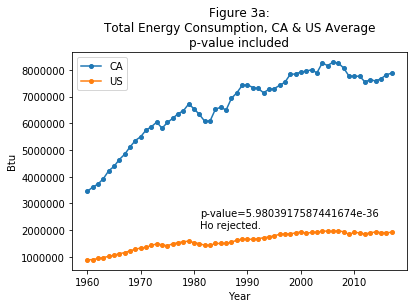

In [31]:
plt.title("Figure 3a:\nTotal Energy Consumption, CA & US Average\np-value included")
plt.plot(TETC_CA_df.Year, TETC_CA_df.TETCB_CA, marker='o', markersize=4, label='CA')
plt.plot(TETC_US_df.Year, TETC_US_df.TETCB_US_AVG, marker='o', markersize=4, label='US')
plt.xlabel("Year")
plt.ylabel("Btu")
plt.annotate(f"p-value={p}\nHo rejected.", (200,80), xycoords='figure points')
plt.legend()

plt.savefig('../Images/TETCB_CA_vs_US_Average_T-test.png',dpi=300)

plt.show()

#### t-test for all states vs US Average

In [32]:
def p_style(val):
    color = 'green' if abs(float(val)) < 0.05 else 'black'
    return 'color: %s' % color

In [33]:
t_test_state_state = []
t_test_state_p = []

p_value_passed = 0

for state in states:
    test, p = stats.ttest_1samp(TEC_vs_CO2_STATES[state+'_TETC'], TETC_US_df.TETCB_US_AVG.mean())
    t_test_state_state.append(state)
    t_test_state_p.append(p)
    if p < 0.05:
        p_value_passed += 1
    
t_test_state = pd.DataFrame(data={'State':t_test_state_state,'p-val':t_test_state_p})
t_test_state = t_test_state.set_index('State')
t_test_state = t_test_state.style.applymap(p_style)
print(f"Amount of states with t-test passed: {p_value_passed}")
t_test_state

Amount of states with t-test passed: 49


,p-val
State,
AL,8.46108e-09
AK,4.63184e-34
AZ,3.00625e-12
AR,1.96885e-25
CA,4.09931e-37
CO,7.41849e-12
CT,1.68127e-44
DE,4.27432e-60
DC,1.07877e-76
